In [1]:
import os.path
import base64
from email.mime.text import MIMEText
from google.oauth2.credentials import Credentials
from googleapiclient.discovery import build



In [2]:
### Getting Path of current file
import os
import sys
from pathlib import Path

path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Email-Assistant-using-Generative-AI


In [3]:
def create_meet_event(service, summary, start_time, end_time, attendee_email):
    event = {
        'summary': summary,
        'start': {'dateTime': start_time, 'timeZone': 'America/New_York'},
        'end': {'dateTime': end_time, 'timeZone': 'America/New_York'},
        'attendees': [{'email': attendee_email}],
        'conferenceData': {
            'createRequest': {
                'conferenceSolutionKey': {'type': 'hangoutsMeet'},
                'requestId': 'meet-' + base64.urlsafe_b64encode(os.urandom(10)).decode()
            }
        }
    }

    event = service.events().insert(
        calendarId='primary',
        body=event,
        conferenceDataVersion=1,
        sendUpdates='all'
    ).execute()

    return event.get('hangoutLink')

def send_email(service, to, subject, message_text):
    message = MIMEText(message_text)
    message['to'] = to
    message['from'] = "me"
    message['subject'] = subject
    raw = base64.urlsafe_b64encode(message.as_bytes()).decode()
    message_body = {'raw': raw}
    result = service.users().messages().send(userId='me', body=message_body).execute()
    print(f"✅ Email with Meet link sent! Message ID: {result['id']}")

if __name__ == '__main__':
    creds = Credentials.from_authorized_user_file(f'{path}/config/token.json')
    calendar_service = build('calendar', 'v3', credentials=creds)
    gmail_service = build('gmail', 'v1', credentials=creds)

    meet_link = create_meet_event(
        service=calendar_service,
        summary='Team Sync-up',
        start_time='2025-07-09T15:00:00-04:00',
        end_time='2025-07-09T15:30:00-04:00',
        attendee_email='arikonthamsaideep@gmail.com'
    )

    send_email(
        service=gmail_service,
        to='arikonthamsaideep@gmail.com',
        subject='Meeting Invitation – Google Meet Link',
        message_text=f"Hi,\n\nHere’s your Google Meet link:\n{meet_link}\n\nThis is a test!"
    )


✅ Email with Meet link sent! Message ID: 197eadad202e6f9f


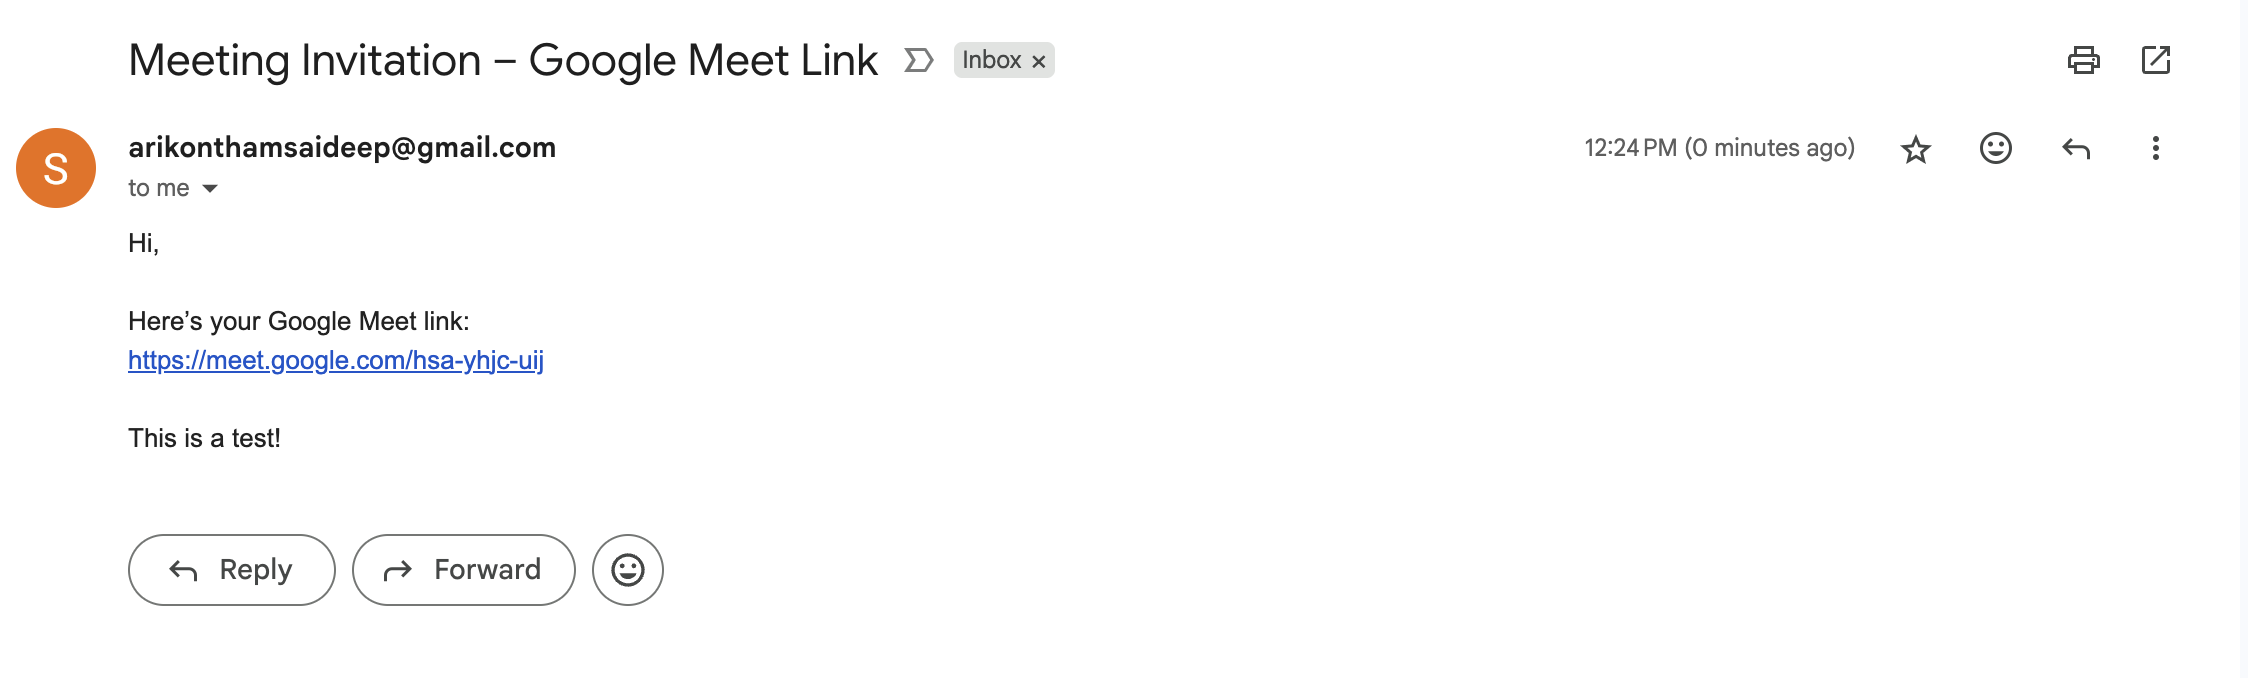